In [1]:
#format the book
from book_format import load_style
load_style() 

Génération d'un signal d'accélération et

$ f = M\gamma + F_v v+ F_s$ M = 10 000kg (thèse de Eric Guillo) codeur 4096 pts par tour (p 164), chaine hyddralique de sortie de lapompe de translation, mettre un retarad, palier de vitesse de 4 km/h en marche avant et arrière,  ZZ4 : 637 kg.m^2, attention au masse tournante
empatttement 3m, dimaètre des toures 1,35m

/home/vandanjon/applications_locales/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:25: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


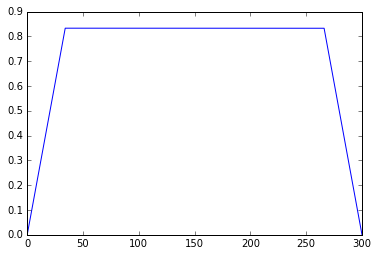

In [3]:

import numpy as np


g=9.81 # acceleration de la gravité

masse=10000  # vmasse de 10 tonnes
rayon = 1.35/2 # rayon des roues
ZZ = 600 # inertie des cylindres

vitesse_max=6/3.6 # vitesse de 6 km/h
temps_max=5*60 # rayon de
acceleration_max = 0.005*g # acceleratmion maximale

vitesse_desire=vitesse_max/2 
acceleration_desire = acceleration_max /2 
tech = 0.01
nech=np.floor(temps_max/tech)+1

temps_montee=vitesse_desire/acceleration_desire
ntemps_montee= np.floor(temps_montee/tech)+1 
temps_montee=(ntemps_montee-1)*tech

temps=np.linspace(0,temps_max,num=nech)
montee=acceleration_desire*temps[0:ntemps_montee]
descente=montee[::-1]
palier=montee[-1]*np.ones(nech-2*ntemps_montee)
profil_vitesse=np.concatenate((montee, palier, descente))
import matplotlib.pyplot as plt
%matplotlib inline 
plt.plot(temps, profil_vitesse)